# Regression Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
X = np.arange(0,2*math.pi, 0.5)
y = np.sin(X)

noise = np.random.normal(0,.2,len(y))

y_noise = y + noise

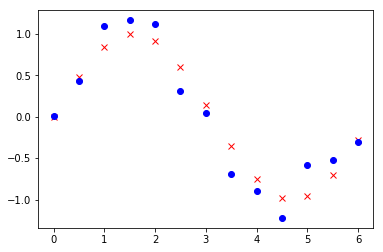

In [3]:
plt.plot(X,y,'rx')
plt.plot(X,y_noise,'bo')
plt.show()

## Now let's try Polynomial Regression!

In [25]:
_X = np.reshape(X, (-1,1))
y = y_noise
_y = np.reshape(y, (-1,1))

def build_polynomial_features(X, poly_num):
    _X = np.reshape(X, (-1,1))
    feature_X = np.ones(_X.shape)
    
    for num in range(1, poly_num+1):
        feature_X = np.hstack((feature_X, np.power(_X, num)))
        
    return feature_X
     
def fit( X, poly_num ):
    
    feature_X = build_polynomial_features(X,poly_num)
    print(feature_X.shape)
        
    return feature_X, np.linalg.pinv(feature_X).dot(_y)
    
def plot(_X, w, y_min=-2, y_max=2):
    pred_X = build_polynomial_features(_X, w.shape[0]-1)
    prediction = (pred_X.dot(w)).reshape(-1)
    
    axes = plt.gca()
    axes.set_ylim([y_min,y_max])
    
    plt.plot(X,y_noise,'bx')
    plt.plot(_X.reshape(-1),prediction, 'r-')
    plt.show()

(13, 1)


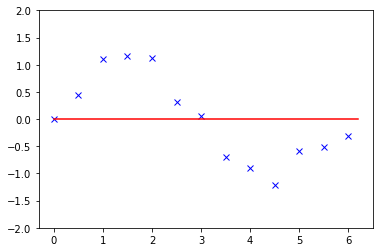

In [26]:
X0, w0 = fit(X, 0)

pred_X = np.arange(0,2*math.pi, 0.1)

plot(pred_X, w0)

(13, 5)


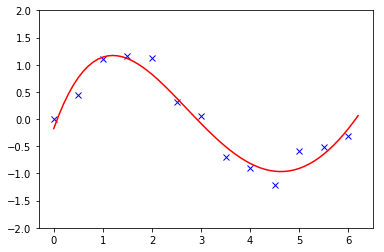

In [27]:
X1, w1 = fit(X, 4)
plot(pred_X, w1)

(13, 11)


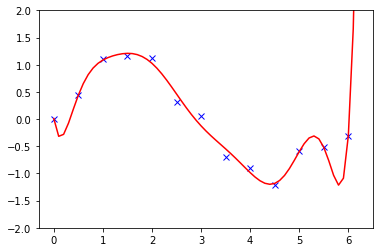

In [28]:
X1, w1 = fit(X, 10)
plot(pred_X, w1)

(13, 16)


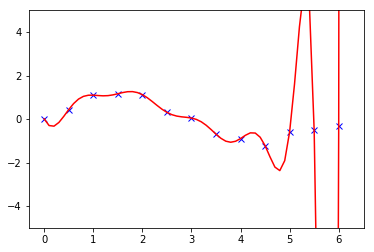

In [32]:
X1, w1 = fit(X, 15)
plot(pred_X, w1, -5, 5)